In [1]:
import pandas as pd
pd.options.display.max_columns = 100
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import geopandas as gpd
import scipy

In [2]:
model_run_dir = r'F:\Projects\Clients\mtc\updated_networks\version_12_v2_fixed_tollseg'

In [3]:
pems_gdf_raw = gpd.read_file(r'F:\Projects\Clients\mtc\updated_networks\validation\data\pems_conflation_result.geojson')

In [4]:
model_data = pd.read_csv(os.path.join(model_run_dir, r'hwy\msamerge5.csv'))

In [5]:
model_net = gpd.read_file(os.path.join(model_run_dir, r'hwy\msamerge5.shp'))

In [6]:
link_data = pd.read_json(os.path.join(model_run_dir, r'hwy\link.json'))

In [7]:
street_names = pd.read_csv(os.path.join(model_run_dir, r'trn\roadway-assignment-names-helper.csv'), encoding="ISO-8859-1")

In [8]:
link_data.head()

,access,bike_access,drive_access,fromIntersectionId,lanes,maxspeed,name,oneWay,ref,roadway,shstGeometryId,shstReferenceId,toIntersectionId,u,v,walk_access,wayId,county,model_link_id,A,B,rail_traveltime,rail_only,locationReferences
0,nan,1,1,505d64eb98f1da8d812a3b3801034308,nan,nan,nan,True,nan,service,208e093f10a62dcc6646a8efa0bde136,00000461094d7f302e7afdcfc7ff5ba3,fb8b1bcb4bb81380f0dc83c1aa5006f4,2.401245e+09,2.401245e+09,1,231794292,Contra Costa,4000000,3000000,3007836,NaN,0,"[{'sequence': 1, 'point': [-122.3315542, 37.98..."
1,nan,1,1,473979c78435732f01ca5a168afb62e0,nan,nan,Yolanda Circle,False,nan,residential,5fe3056a5583474c0c898983cd6a638b,00000b467d2e08f9abf13eeafee3ed46,5adfc2245bcc082b5b004dbc53d9dfb0,5.783907e+07,5.786973e+07,1,7864473,Contra Costa,4000001,3000001,3077456,NaN,0,"[{'sequence': 1, 'point': [-121.94477, 37.9533..."
2,nan,1,1,fc7b575d5d8c961d4a70fca846ae7f80,nan,25 mph,Molino Avenue,False,nan,tertiary,38e962038ecf17c6c7394ba88bc3b4c1,000018062272093dbaa5d49303062454,7550e87fc64657a10282672d814ab3c5,1.024389e+09,1.104250e+08,1,12183318,Marin,8000000,5000000,5014577,NaN,0,"[{'sequence': 1, 'point': [-122.5398278, 37.89..."
3,nan,1,1,6c60cf34e9dc3e123eefb829fe80c76a,nan,nan,Mina Way,False,nan,residential,f3558c6d4c7e3d48742ea3755186c20d,000018a23d1330dcfbae79f44e9fca1a,cce854f3462409d6825c15ac6309f495,6.556143e+07,1.325928e+09,1,8951190,Santa Clara,2000000,2000000,2104155,NaN,0,"[{'sequence': 1, 'point': [-122.031897, 37.267..."
4,nan,1,1,013e1f994fd86c1f226098f8364f7286,nan,nan,nan,False,nan,service,550ef74674d67256659c5ab80d35d7a7,0000491ae6975893d350d75ed7aa5842,9513a9ae6406c5d62f9bf1a7bafd2b73,4.545576e+09,4.545576e+09,1,458575920,Santa Clara,2000001,2000001,2105946,NaN,0,"[{'sequence': 1, 'point': [-122.0118628, 37.37..."


In [9]:
pems_gdf_raw

,station,district,route,direction,type,time_period,lanes,median_flow,avg_flow,sd_flow,median_speed,avg_speed,sd_speed,median_occup,avg_occup,sd_occupancy,days_observed,state_pm,abs_pm,latitude,longitude,year,shstReferenceId,roadway,tomtom_shieldnum,tomtom_rtedir,snap_distance,geometry
0,400000,4,101,S,ML,AM,3,16383.0,16237.843137,691.559263,46.382201,46.519705,10.136418,0.130709,0.141076,0.047421,51,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
1,400000,4,101,S,ML,EA,3,4366.5,4376.357143,102.251993,68.827412,68.799798,0.784335,0.041496,0.041541,0.001666,56,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
2,400000,4,101,S,ML,EV,3,8523.0,8434.255814,420.135754,67.337493,67.228338,0.694450,0.026681,0.026709,0.001362,43,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
3,400000,4,101,S,ML,MD,3,18178.0,18298.847826,560.210197,63.549964,63.321634,1.599264,0.067676,0.068619,0.004611,46,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
4,400000,4,101,S,ML,PM,3,14616.5,14651.839286,471.933769,66.213506,66.064148,1.070128,0.065185,0.065373,0.002153,56,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76052,419490,4,80,W,OR,PM,1,608.0,606.370370,47.784088,NaN,NaN,NaN,0.017552,0.017711,0.001270,27,624.0,30.282,38.099842,-122.229874,2017,a05a0ec01eac17f2145d51dc7df1cc73,None,None,None,NaN,POINT (-122.22987 38.09984)
76053,419660,4,37,E,FR,PM,3,1834.5,1802.812500,115.583862,NaN,NaN,NaN,0.007200,0.007081,0.000455,16,1506.0,18.953,38.136770,-122.257039,2017,ed170334b0ed05f7da63824ddbdacaca,None,None,None,NaN,POINT (-122.25704 38.13677)
76054,419661,4,37,E,OR,PM,1,2915.0,2897.375000,191.152600,NaN,NaN,NaN,0.030329,0.030199,0.001982,16,1513.0,19.053,38.137844,-122.255865,2017,42ddf62777fd2b0b16bb20056419139a,None,None,None,NaN,POINT (-122.25587 38.13784)
76055,419662,4,37,E,OR,PM,1,2676.0,2648.375000,142.465844,NaN,NaN,NaN,0.048598,0.048334,0.002333,16,1525.0,19.283,38.140282,-122.253117,2017,None,None,None,None,NaN,POINT (-122.25312 38.14028)


## Converting Into WGS84 Coordinates

In [10]:
# Replacing geometry using lat long locations
pems_gdf = gpd.GeoDataFrame(pems_gdf_raw.drop(columns='geometry'), 
                            geometry=gpd.points_from_xy(pems_gdf_raw.longitude, pems_gdf_raw.latitude))
pems_gdf.set_crs("EPSG:4326", inplace=True)

,station,district,route,direction,type,time_period,lanes,median_flow,avg_flow,sd_flow,median_speed,avg_speed,sd_speed,median_occup,avg_occup,sd_occupancy,days_observed,state_pm,abs_pm,latitude,longitude,year,shstReferenceId,roadway,tomtom_shieldnum,tomtom_rtedir,snap_distance,geometry
0,400000,4,101,S,ML,AM,3,16383.0,16237.843137,691.559263,46.382201,46.519705,10.136418,0.130709,0.141076,0.047421,51,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
1,400000,4,101,S,ML,EA,3,4366.5,4376.357143,102.251993,68.827412,68.799798,0.784335,0.041496,0.041541,0.001666,56,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
2,400000,4,101,S,ML,EV,3,8523.0,8434.255814,420.135754,67.337493,67.228338,0.694450,0.026681,0.026709,0.001362,43,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
3,400000,4,101,S,ML,MD,3,18178.0,18298.847826,560.210197,63.549964,63.321634,1.599264,0.067676,0.068619,0.004611,46,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
4,400000,4,101,S,ML,PM,3,14616.5,14651.839286,471.933769,66.213506,66.064148,1.070128,0.065185,0.065373,0.002153,56,288.0,459.520,38.081167,-122.547606,2005,df209cac09d05a2f7e0a22dc8e931df8,motorway,101,S,3.17488,POINT (-122.54761 38.08117)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76052,419490,4,80,W,OR,PM,1,608.0,606.370370,47.784088,NaN,NaN,NaN,0.017552,0.017711,0.001270,27,624.0,30.282,38.099842,-122.229874,2017,a05a0ec01eac17f2145d51dc7df1cc73,None,None,None,NaN,POINT (-122.22987 38.09984)
76053,419660,4,37,E,FR,PM,3,1834.5,1802.812500,115.583862,NaN,NaN,NaN,0.007200,0.007081,0.000455,16,1506.0,18.953,38.136770,-122.257039,2017,ed170334b0ed05f7da63824ddbdacaca,None,None,None,NaN,POINT (-122.25704 38.13677)
76054,419661,4,37,E,OR,PM,1,2915.0,2897.375000,191.152600,NaN,NaN,NaN,0.030329,0.030199,0.001982,16,1513.0,19.053,38.137844,-122.255865,2017,42ddf62777fd2b0b16bb20056419139a,None,None,None,NaN,POINT (-122.25587 38.13784)
76055,419662,4,37,E,OR,PM,1,2676.0,2648.375000,142.465844,NaN,NaN,NaN,0.048598,0.048334,0.002333,16,1525.0,19.283,38.140282,-122.253117,2017,None,None,None,None,NaN,POINT (-122.25312 38.14028)


In [11]:
pems_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
# pems_gdf.to_file(r'F:\Projects\Clients\mtc\updated_networks\validation\data\pems_conflation_result.shp')

## Count Station Analysis

#### Total Number of Count records
A unique count record is defined have a distinct station, direction, and year

In [13]:
print("Number of unique counts: ", 
      len(pems_gdf.groupby(['station', 'year', 'direction'])))

Number of unique counts:  15403


In [14]:
for year in pems_gdf.year.unique():
    print("Number of unique count locations for year ", year, ':',
      len(pems_gdf[pems_gdf['year'] == year].groupby(['station', 'year', 'direction'])))

Number of unique count locations for year  2005 : 637
Number of unique count locations for year  2006 : 607
Number of unique count locations for year  2007 : 552
Number of unique count locations for year  2008 : 538
Number of unique count locations for year  2009 : 540
Number of unique count locations for year  2010 : 518
Number of unique count locations for year  2011 : 1046
Number of unique count locations for year  2012 : 999
Number of unique count locations for year  2013 : 1412
Number of unique count locations for year  2014 : 1600
Number of unique count locations for year  2015 : 1849
Number of unique count locations for year  2016 : 2393
Number of unique count locations for year  2017 : 2712


In [15]:
print("Number of unique count locations: ", 
      pems_gdf['station'].nunique())

Number of unique count locations:  3700


How many count locations do not have all time periods?

In [16]:
pems_gdf['time_of_day_count'] = pems_gdf.groupby(['station', 'year', 'direction'])['time_period'].transform('nunique')
print("Number of count locations that do not have all 5 time of day periods listed: ", 
      len(pems_gdf[pems_gdf['time_of_day_count'] < 5].groupby(['station', 'year', 'direction'])))

Number of count locations that do not have all 5 time of day periods listed:  576


In [17]:
pems_gdf['year_count'] = pems_gdf.groupby(['station', 'direction'])['year'].transform('nunique')
print("Number of count locations have all 13 time of day periods listed: ", 
      len(pems_gdf[pems_gdf['year_count'] == 13].groupby(['station', 'direction'])))

Number of count locations have all 13 time of day periods listed:  97


In [18]:
pems_gdf[(pems_gdf['year_count'] == 13) & (pems_gdf['time_of_day_count'] == 5)].to_file(
    r'..\output\pems_links_with_counts_every_year.shp')

## Calculating Scaling Factors

In [19]:
# Using only links that have all years and all time of day counts
every_year_counts = pems_gdf[(pems_gdf['year_count'] == 13) & (pems_gdf['time_of_day_count'] == 5)]

# Summing time of day periods to get avg daily flow
every_year_daily_counts = every_year_counts.groupby(['station', 'direction', 'year'])['avg_flow'].sum()
every_year_daily_counts = every_year_daily_counts.to_frame()

# dividing by 2015 counts to get scaling factor for that count station
counts_on_links_2015 = every_year_daily_counts.xs(2015, level=2)
every_year_daily_counts['scaling_factor'] = every_year_daily_counts.div(counts_on_links_2015)
every_year_daily_counts.head(30)

avg_flow  scaling_factor
station direction year                               
400001  N         2005   79392.537062        1.092141
                  2006   78826.458265        1.084354
                  2007   75668.063197        1.040906
                  2008   73294.307517        1.008252
                  2009   72960.146253        1.003655
                  2010   72852.436440        1.002174
                  2011   70829.553531        0.974346
                  2012   71000.233013        0.976694
                  2013   72958.906565        1.003638
                  2014   70928.501378        0.975708
                  2015   72694.426221        1.000000
                  2016   72613.167349        0.998882
                  2017   71893.656925        0.988984
400041  N         2005  105122.623843        1.004948
                  2006  104566.672441        0.999633
                  2007  103210.336888        0.986667
                  2008   99463.232522        0.950845
                  2009   98155.424947        0.938343
                  2010   99495.207753        0.951151
                  2011   97400.496234        0.931126
                  2012   98985.920243        0.946282
                  2013   88227.141059        0.843431
                  2014   95795.782617        0.915785
                  2015  104605.068432        1.000000
                  2016  104013.436595        0.994344
                  2017  105318.721568        1.006822
400043  S         2005  108836.486019        0.985934
                  2006  109302.377114        0.990154
                  2007  110327.071311        0.999437
                  2008  108741.478713        0.985073

In [20]:
every_year_daily_counts.reset_index(inplace=True)

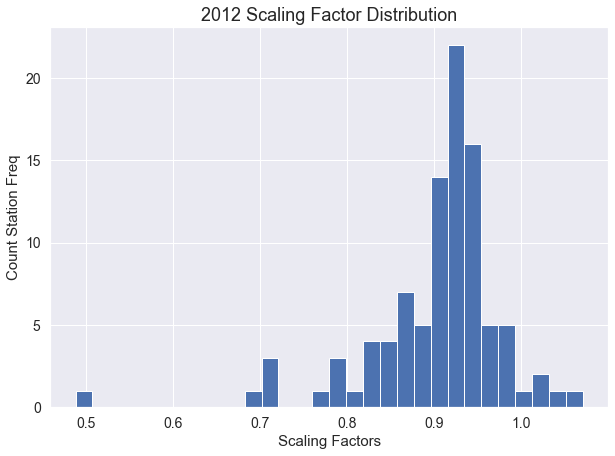

In [21]:
plt.figure(figsize=(10,7))
every_year_daily_counts[every_year_daily_counts['year'] == 2012].scaling_factor.hist(bins=30)
plt.xlabel('Scaling Factors', size=15)
plt.ylabel('Count Station Freq', size=15)
plt.title('2012 Scaling Factor Distribution', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

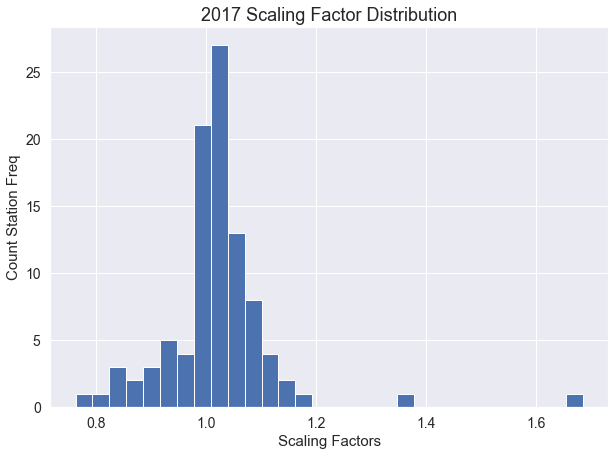

In [22]:
plt.figure(figsize=(10,7))
every_year_daily_counts[every_year_daily_counts['year'] == 2017].scaling_factor.hist(bins=30)
plt.xlabel('Scaling Factors', size=15)
plt.ylabel('Count Station Freq', size=15)
plt.title('2017 Scaling Factor Distribution', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [23]:
# Mean function weighted by average daily flow
wm = lambda x: np.average(x, weights = every_year_daily_counts.loc[x.index, 'avg_flow'])
scaling_factors = every_year_daily_counts.groupby(['year']).agg(unweighted_scaling_factor=('scaling_factor', 'mean'),
                                                                weighted_scaling_factor=('scaling_factor', wm))
scaling_factors

,unweighted_scaling_factor,weighted_scaling_factor
year,,
2005,0.983836,0.989378
2006,0.970784,0.978844
2007,0.974479,0.978401
2008,0.961442,0.982114
2009,0.952708,0.972755
2010,0.954041,0.956841
2011,0.921283,0.923026
2012,0.901651,0.905075
2013,0.908221,0.909869


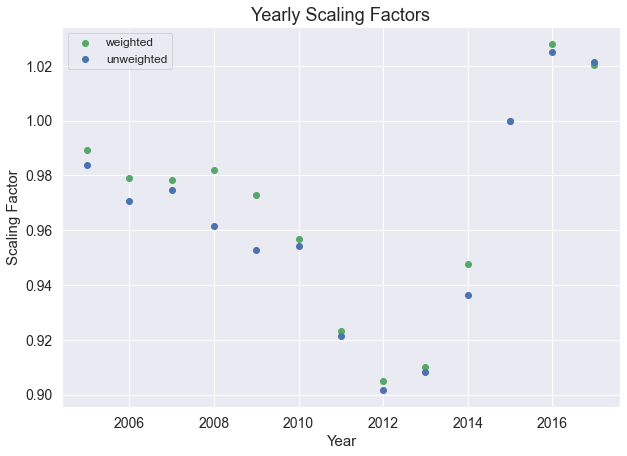

In [24]:
plt.figure(figsize=(10,7))
plt.title('Yearly Scaling Factors', size=18)
plt.scatter(x=scaling_factors.index, y=scaling_factors['weighted_scaling_factor'], c='g', label='weighted')
plt.scatter(x=scaling_factors.index, y=scaling_factors['unweighted_scaling_factor'], c='b', label='unweighted')
plt.xlabel('Year', size=15)
plt.ylabel('Scaling Factor', size=15)
plt.legend(fontsize=12)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [25]:
pems_gdf['type'].value_counts()

ML    60319
OR     9309
FR     5733
FF      666
HV       30
Name: type, dtype: int64

In [26]:
def calculate_scaling_factors(pems_data,
                              count_grp_vars=['station', 'direction', 'year'],
                              scaling_factor_grp_vars=['year'],
                              base_year=2015):
    # grouping counts together based on whatever segmentation you want
    counts_grped = pems_data.groupby(count_grp_vars)['avg_flow'].sum()
    counts_grped = counts_grped.to_frame()
    
    # dividing by 2015 counts to get scaling factor for that count station
    counts_on_links_2015 = counts_grped.xs(base_year, level=count_grp_vars.index('year'))
    counts_grped['scaling_factor'] = counts_grped.div(counts_on_links_2015)
    display(counts_grped.head(10))
    
    # averaging scaling factors
    counts_grped.reset_index(inplace=True)
    
    # Mean function weighted by average daily flow
    wm = lambda x: np.average(x, weights = counts_grped.loc[x.index, 'avg_flow'])
    scaling_factors = counts_grped.groupby(scaling_factor_grp_vars).agg(
        unweighted_scaling_factor=('scaling_factor', 'mean'),
        weighted_scaling_factor=('scaling_factor', wm))
    
    return counts_grped, scaling_factors

### What if we only want to include years 2013 to 2017

In [27]:
pems_13to17 = pems_gdf[(pems_gdf['year'] >= 2013) & (pems_gdf['year'] <= 2017) & (pems_gdf['time_of_day_count'] == 5)].copy()
pems_13to17['year_count'] = pems_13to17.groupby(['station', 'direction'])['year'].transform('nunique')
pems_13to17_all_years = pems_13to17[pems_13to17['year_count'] == pems_13to17['year_count'].max()]
print("Number of count locations have all every year between 2013 and 2017 listed: ", 
      len(pems_13to17_all_years.groupby(['station', 'direction'])))

Number of count locations have all every year between 2013 and 2017 listed:  636


In [28]:
pems_13to17_all_years.to_file(r'F:\Projects\Clients\mtc\updated_networks\validation\data\pems_2013to2017_every_year.shp')

In [29]:
pems_13to17_grp,  pems_13to17_scaling_factors = calculate_scaling_factors(
    pems_13to17_all_years, count_grp_vars=['station', 'direction', 'year'], scaling_factor_grp_vars=['year'], base_year=2015)
pems_13to17_scaling_factors

avg_flow  scaling_factor
station direction year                               
400001  N         2013   72958.906565        1.003638
                  2014   70928.501378        0.975708
                  2015   72694.426221        1.000000
                  2016   72613.167349        0.998882
                  2017   71893.656925        0.988984
400007  N         2013  127108.699372        0.836272
                  2014  127346.773183        0.837838
                  2015  151994.451248        1.000000
                  2016  141164.876012        0.928750
                  2017  139941.226691        0.920700

,unweighted_scaling_factor,weighted_scaling_factor
year,,
2013,0.897421,0.920867
2014,0.915198,0.946709
2015,1.000000,1.000000
2016,0.991458,1.005237
2017,1.007195,1.022743


In [30]:
pems_13to17_grp,  pems_13to17_scaling_factors = calculate_scaling_factors(
    pems_13to17_all_years, count_grp_vars=['station', 'direction', 'time_period', 'year'], 
    scaling_factor_grp_vars=['year', 'time_period'], base_year=2015)
pems_13to17_scaling_factors

avg_flow  scaling_factor
station direction time_period year                              
400001  N         AM          2013  24632.647887        1.076609
                              2014  23462.250000        1.025455
                              2015  22879.842857        1.000000
                              2016  22948.736111        1.003011
                              2017  22640.492958        0.989539
                  EA          2013   7315.727273        0.906302
                              2014   7549.107143        0.935214
                              2015   8072.062500        1.000000
                              2016   8537.581081        1.057670
                              2017   8853.123288        1.096761

unweighted_scaling_factor  weighted_scaling_factor
year time_period                                                    
2013 AM                            0.921689                 0.952466
     EA                            1.188332                 0.883430
     EV                            0.909652                 0.912082
     MD                            0.901243                 0.908628
     PM                            0.915445                 0.947150
2014 AM                            0.937069                 0.972351
     EA                            1.098122                 0.915295
     EV                            0.915838                 0.939024
     MD                            0.899992                 0.930949
     PM                            0.935209                 0.968130
2015 AM                            1.000000                 1.000000
     EA                            1.000000                 1.000000
     EV                            1.000000                 1.000000
     MD                            1.000000                 1.000000
     PM                            1.000000                 1.000000
2016 AM                            0.981507                 0.994693
     EA                            1.042895                 1.078897
     EV                            1.015324                 1.021590
     MD                            1.001621                 1.014305
     PM                            0.970402                 0.983121
2017 AM                            0.993774                 1.002813
     EA                            1.105698                 1.149644
     EV                            1.038588                 1.056691
     MD                            1.016353                 1.028541
     PM                            0.978118                 0.996152

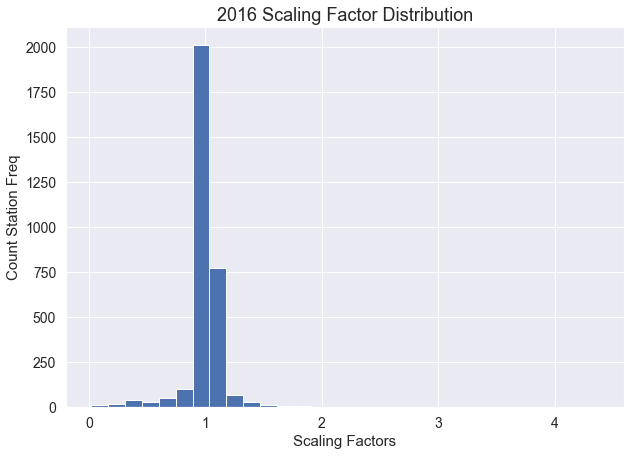

In [31]:
plt.figure(figsize=(10,7))
pems_13to17_grp[pems_13to17_grp['year'] == 2016].scaling_factor.hist(bins=30)
plt.xlabel('Scaling Factors', size=15)
plt.ylabel('Count Station Freq', size=15)
plt.title('2016 Scaling Factor Distribution', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

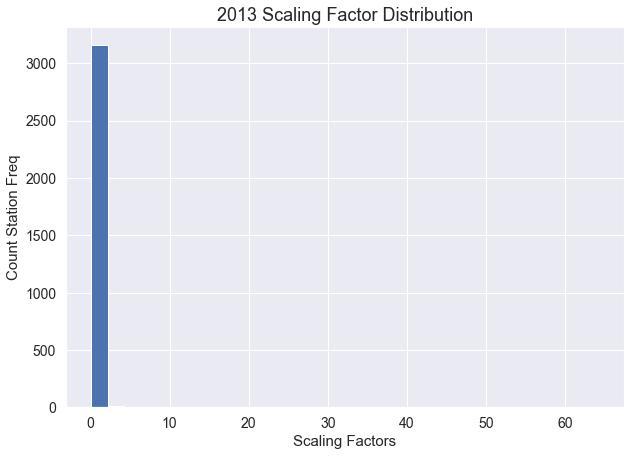

In [32]:
plt.figure(figsize=(10,7))
pems_13to17_grp[pems_13to17_grp['year'] == 2013].scaling_factor.hist(bins=30)
plt.xlabel('Scaling Factors', size=15)
plt.ylabel('Count Station Freq', size=15)
plt.title('2013 Scaling Factor Distribution', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [33]:
pems_13to17_grp[pems_13to17_grp['scaling_factor'] > 5].sort_values('scaling_factor', ascending=False)

,station,direction,time_period,year,avg_flow,scaling_factor
9430,402039,E,EA,2013,221.458333,64.232504
9431,402039,E,EA,2014,168.163265,48.774627
9505,402043,E,EA,2013,265.054054,45.187332
9480,402041,E,EA,2013,236.477612,44.505618
9481,402041,E,EA,2014,175.725490,33.071932
12105,402971,S,EA,2013,294.285714,31.530612
9506,402043,E,EA,2014,184.377358,31.433290
6905,401504,E,EA,2013,617.833333,22.347163
6906,401504,E,EA,2014,605.113636,21.887089
12115,402971,S,MD,2013,3470.619048,14.509277


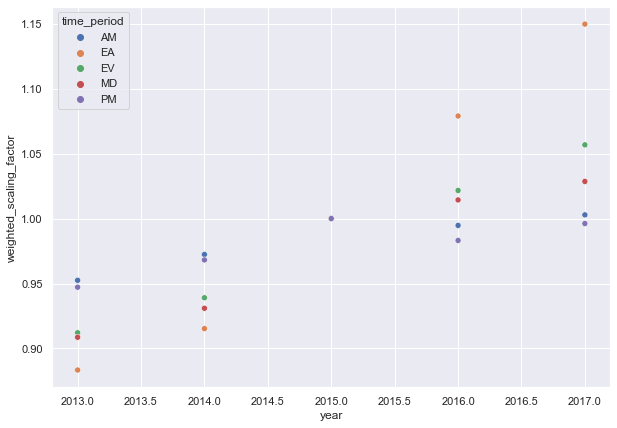

In [34]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pems_13to17_scaling_factors.reset_index(),
    x='year',
    y='weighted_scaling_factor',
    hue='time_period',
)
plt.show()

### What if we only want to include years 2014 to 2016

In [35]:
pems_14to16 = pems_gdf[(pems_gdf['year'] >= 2014) & (pems_gdf['year'] <= 2016) & (pems_gdf['time_of_day_count'] == 5)].copy()
pems_14to16['year_count'] = pems_14to16.groupby(['station', 'direction'])['year'].transform('nunique')
pems_14to16_all_years = pems_14to16[pems_14to16['year_count'] == pems_14to16['year_count'].max()]
print("Number of count locations have all every year between 2014 and 2016 listed: ", 
      len(pems_14to16_all_years.groupby(['station', 'direction'])))

Number of count locations have all every year between 2014 and 2016 listed:  991


In [36]:
pems_14to16_all_years.to_file(r'F:\Projects\Clients\mtc\updated_networks\validation\data\pems_2014to2016_every_year.shp')

In [37]:
pems_14to16_grp,  pems_14to16_scaling_factors = calculate_scaling_factors(
    pems_14to16_all_years, count_grp_vars=['station', 'direction', 'year'], scaling_factor_grp_vars=['year'], base_year=2015)
pems_14to16_scaling_factors

avg_flow  scaling_factor
station direction year                               
400001  N         2014   70928.501378        0.975708
                  2015   72694.426221        1.000000
                  2016   72613.167349        0.998882
400006  S         2014   96709.569891        0.971543
                  2015   99542.256162        1.000000
                  2016  101750.224828        1.022181
400007  N         2014  127346.773183        0.837838
                  2015  151994.451248        1.000000
                  2016  141164.876012        0.928750
400009  W         2014  122852.780831        1.022058

,unweighted_scaling_factor,weighted_scaling_factor
year,,
2014,0.927826,0.959445
2015,1.000000,1.000000
2016,0.996955,1.008534


In [38]:
pems_14to16_grp,  pems_14to16_scaling_factors = calculate_scaling_factors(
    pems_14to16_all_years, count_grp_vars=['station', 'direction', 'time_period', 'year'], 
    scaling_factor_grp_vars=['year', 'time_period'], base_year=2015)
pems_14to16_scaling_factors

avg_flow  scaling_factor
station direction time_period year                              
400001  N         AM          2014  23462.250000        1.025455
                              2015  22879.842857        1.000000
                              2016  22948.736111        1.003011
                  EA          2014   7549.107143        0.935214
                              2015   8072.062500        1.000000
                              2016   8537.581081        1.057670
                  EV          2014   9162.789474        0.974938
                              2015   9398.333333        1.000000
                              2016   9323.211268        0.992007
                  MD          2014  18982.450000        0.924930

unweighted_scaling_factor  weighted_scaling_factor
year time_period                                                    
2014 AM                            0.948741                 0.984589
     EA                            1.031769                 0.918473
     EV                            0.921997                 0.947833
     MD                            0.914043                 0.944623
     PM                            0.949350                 0.983003
2015 AM                            1.000000                 1.000000
     EA                            1.000000                 1.000000
     EV                            1.000000                 1.000000
     MD                            1.000000                 1.000000
     PM                            1.000000                 1.000000
2016 AM                            0.987426                 0.997481
     EA                            1.049042                 1.085926
     EV                            1.019973                 1.027558
     MD                            1.006131                 1.016220
     PM                            0.976519                 0.985386

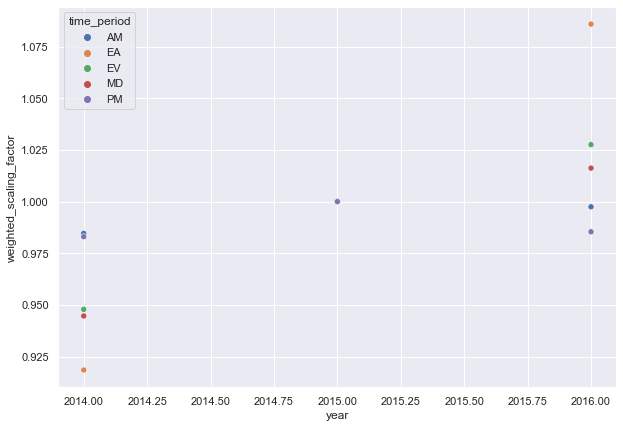

In [39]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=pems_14to16_scaling_factors.reset_index(),
    x='year',
    y='weighted_scaling_factor',
    hue='time_period',
)
plt.show()

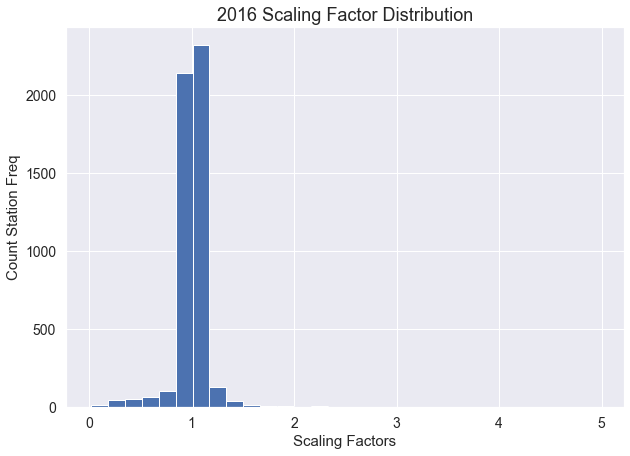

In [40]:
plt.figure(figsize=(10,7))
pems_14to16_grp[pems_14to16_grp['year'] == 2016].scaling_factor.hist(bins=30)
plt.xlabel('Scaling Factors', size=15)
plt.ylabel('Count Station Freq', size=15)
plt.title('2016 Scaling Factor Distribution', size=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [41]:
pems_14to16_grp[pems_14to16_grp['scaling_factor'] > 5].sort_values('scaling_factor', ascending=False)

,station,direction,time_period,year,avg_flow,scaling_factor
8283,402039,E,EA,2014,168.163265,48.774627
8313,402041,E,EA,2014,175.725490,33.071932
8343,402043,E,EA,2014,184.377358,31.433290
5988,401504,E,EA,2014,605.113636,21.887089
4203,400966,E,EA,2014,672.240000,11.555187
7428,401800,E,EA,2014,660.478261,7.635587
7008,401696,E,EA,2014,343.435897,7.154915


## Applying scaling factors to 2013 to 2017 counts to compare to network

In [42]:
pems_13to17_scaling_factors

unweighted_scaling_factor  weighted_scaling_factor
year time_period                                                    
2013 AM                            0.921689                 0.952466
     EA                            1.188332                 0.883430
     EV                            0.909652                 0.912082
     MD                            0.901243                 0.908628
     PM                            0.915445                 0.947150
2014 AM                            0.937069                 0.972351
     EA                            1.098122                 0.915295
     EV                            0.915838                 0.939024
     MD                            0.899992                 0.930949
     PM                            0.935209                 0.968130
2015 AM                            1.000000                 1.000000
     EA                            1.000000                 1.000000
     EV                            1.000000                 1.000000
     MD                            1.000000                 1.000000
     PM                            1.000000                 1.000000
2016 AM                            0.981507                 0.994693
     EA                            1.042895                 1.078897
     EV                            1.015324                 1.021590
     MD                            1.001621                 1.014305
     PM                            0.970402                 0.983121
2017 AM                            0.993774                 1.002813
     EA                            1.105698                 1.149644
     EV                            1.038588                 1.056691
     MD                            1.016353                 1.028541
     PM                            0.978118                 0.996152

In [43]:
# CRS is NAD83 StatePlane California VI FIPS 0406 Feet (ESRI 102646) 
model_net.crs = '+proj=lcc +lat_1=32.78333333333333 +lat_2=33.88333333333333 +lat_0=32.16666666666666 +lon_0=-116.25 +x_0=2000000 +y_0=500000.0000000002 +ellps=GRS80 +datum=NAD83 +to_meter=0.3048006096012192 +no_defs'
model_net.to_crs(epsg=4326)

,A,B,NAME,SHSTGEOMETR,MODEL_LINK_,FT,ASSIGNABLE,TRANSIT,TOLLBOOTH,DISTANCE,CNTYPE,FEET,TOLLEA_DA,TOLLAM_DA,TOLLMD_DA,TOLLPM_DA,TOLLEV_DA,TOLLEA_S2,TOLLAM_S2,TOLLMD_S2,TOLLPM_S2,TOLLEV_S2,TOLLEA_S3,TOLLAM_S3,TOLLMD_S3,TOLLPM_S3,TOLLEV_S3,TOLLEA_VSM,TOLLAM_VSM,TOLLMD_VSM,TOLLPM_VSM,TOLLEV_VSM,TOLLEA_SML,TOLLAM_SML,TOLLMD_SML,TOLLPM_SML,TOLLEV_SML,TOLLEA_MED,TOLLAM_MED,TOLLMD_MED,TOLLPM_MED,TOLLEV_MED,TOLLEA_LRG,TOLLAM_LRG,TOLLMD_LRG,TOLLPM_LRG,TOLLEV_LRG,AT,CAPCLASS,FFS,...,VOLEV_DAT,VOLEV_S2T,VOLEV_S3T,VOLEV_SMT,VOLEV_HVT,VOLEV_MAZ,VOLEV_TOT,DELAYEV,VMTEV,VHTEV,CTIMEV,CSPDEV,F_JNCTID,T_JNCTID,FRC,FREEWAY,TOLLRD,ONEWAY,KPH,MINUTES,CARRIAGE,LANES,RAMP,SPEEDCAT,USECLASS,NUMLANES,HIGHWAYT,B_CLASS,REPRIORITIZ,GRADE_CAT,PED_FLAG,BIKEPEDOK,RTEDIR,PEMSID,VOL24HR_DA,VOL24HR_S2,VOL24HR_S3,VOL24HR_SM,VOL24HR_HV,VOL24HR_DAT,VOL24HR_S2T,VOL24HR_S3T,VOL24HR_SMT,VOL24HR_HVT,VOL24HR_MAZ,VOL24HR_TOT,DELAY24HR,VMT24HR,VHT24HR,geometry
0,1,1001671,None,taz_cc1,77108,8,1,0,0,0.17232,TAZ,909.82562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,18,...,4.20000,0,0,0,0,0.0,55.54171,0.0,0.00000,0.0,0.00000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,175.93317,12.42790,9.41627,84.20510,0.18441,21.56932,0,0,0,0,0.0,303.73618,0.00000,0.00000,0.00000,"LINESTRING (-122.42356 37.77046, -122.42630 37..."
1,1,1021297,None,taz_cc3,78851,8,1,0,0,0.08112,TAZ,428.30807,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,18,...,17.30000,0,0,0,0,0.0,129.21001,0.0,0.00000,0.0,0.00000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,194.88911,18.34158,7.56819,196.55667,1.05336,41.62740,0,0,0,0,0.0,460.03632,0.00000,0.00000,0.00000,"LINESTRING (-122.42356 37.77046, -122.42375 37..."
2,1,1024255,None,taz_cc2,79119,8,1,0,0,0.07073,TAZ,373.47501,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,18,...,5.30000,0,0,0,0,0.0,26.08343,0.0,0.00000,0.0,0.00000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,193.44371,12.29109,5.92554,135.51822,0.68222,26.40328,0,0,0,0,0.0,374.26407,0.00000,0.00000,0.00000,"LINESTRING (-122.42356 37.77046, -122.42240 37..."
3,2,1006730,None,taz_cc5,77532,8,1,0,0,0.12418,TAZ,655.68799,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,18,...,20.30000,0,0,0,0,0.0,134.63719,0.0,0.00000,0.0,0.00000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,335.76831,39.94148,23.31043,198.55319,0.54413,82.50145,0,0,0,0,0.0,680.61902,0.00000,0.00000,0.00000,"LINESTRING (-122.41851 37.76431, -122.42055 37..."
4,2,1012189,None,taz_cc6,78081,8,1,0,0,0.07230,TAZ,381.73697,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,18,18,...,24.80000,0,0,0,0,0.0,234.17882,0.0,0.00000,0.0,0.00000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,553.70697,48.81653,31.76686,548.08917,3.80741,102.02439,0,0,0,0,0.0,1288.21130,0.00000,0.00000,0.00000,"LINESTRING (-122.41851 37.76431, -122.41747 37..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425796,9520986,5020986,Egress Dummy Redwood Highway,None,26005958,8,1,0,0,0.00675,TANA,35.63958,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,48,18,...,0.00000,0,0,0,0,0.0,0.00000,0.0,0.00000,0.0,0.00000,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0,0,0,0,0.0,0.00000,0.00000,0.00000,0.00000,"LINESTRING (-122.53832 38.02367, -122.53843 38..."
425797,9520986,9519573,Managed Lane Redwood Highway,None,18032689,1,1,0,0,0.48146,TANA,2542.13306,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,41,65,...,0.00000,0,0,0,0,0.0,0.00000,0.0,0.00000,0.0,0.44443,65.0,0,0,0,0,0,0,0,

In [44]:
link_id_lookup = link_data[['shstReferenceId', 'model_link_id', 'county']]

In [45]:
# merging shstReferenceId
model_data = pd.merge(
    model_data,
    link_id_lookup,
    how='left',
    on='model_link_id'
)
# merging street names
model_data = pd.merge(
    model_data,
    street_names,
    how='left',
    on='model_link_id'
)
model_data[model_data['shstReferenceId'].notna()]

,a,b,model_link_id,distance,feet,numlanes,cntype,useclass,ft,at,capclass,ffs,fft,pemsid,shstgeometryid,cspdEA,cspdAM,cspdMD,cspdPM,cspdEV,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,vol24hr_tot,capEA,capAM,capMD,capPM,capEV,ctimEA,ctimAM,ctimMD,ctimPM,ctimEV,vcEA,vcAM,vcMD,vcPM,vcEV,shstReferenceId,county,name,simple_name
16496,1000000,1000037,49074,0.06,337.39,0,TANA,0,7,2,27,25.0,0.15,0,c4b4ba214465fe2536e9d0412c4f325c,25.00,24.97,24.98,24.98,24.99,71.41,536.06,493.83,473.22,210.75,1785.27,2100.0,2555.0,3500.0,2555.0,5600.0,0.15,0.15,0.15,0.15,0.15,0.0340,0.2099,0.1412,0.1853,0.0376,40441e127156845894630a801e0c3b21,San Francisco,Anza Street,Anza
16497,1000000,1022717,21418,0.06,336.71,0,TANA,0,7,2,27,25.0,0.15,0,c352fdb8d007bd339f8b573ffd595d0a,25.00,25.00,25.00,25.00,25.00,0.27,12.75,23.56,26.03,21.97,84.58,2100.0,2555.0,3500.0,2555.0,5600.0,0.15,0.15,0.15,0.15,0.15,0.0001,0.0050,0.0067,0.0102,0.0042,858ead31091609b65bcde595db6c460c,San Francisco,Anza Street,Anza
16499,1000001,1005026,48475,0.05,280.90,0,TANA,0,7,3,37,30.0,0.11,0,cbeee197e274f0b9939650efbcea1bd4,30.00,30.00,29.99,29.99,30.00,3.10,80.76,85.28,145.97,51.94,367.04,2100.0,2555.0,3500.0,2555.0,5600.0,0.11,0.11,0.11,0.11,0.11,0.0015,0.0348,0.0285,0.0634,0.0118,3bedb48e9eba9350fffa086c3f385130,San Francisco,Augusta Street,Augusta
16500,1000001,1018851,22763,0.06,304.44,0,TANA,0,7,3,37,30.0,0.12,0,63d8c52d02c4e9e594ffc202ae75a057,30.00,29.98,29.98,29.98,29.99,28.09,384.36,431.95,316.67,203.12,1364.19,2100.0,2555.0,3500.0,2555.0,5600.0,0.12,0.12,0.12,0.12,0.12,0.0142,0.1705,0.1399,0.1459,0.0426,8de106e62dec690c5ef7075cafc9661b,San Francisco,Augusta Street,Augusta
16501,1000002,1012846,3,0.06,302.47,0,TANA,0,4,1,14,25.0,0.14,0,16ac50c41bb6e6ba642cdbc0ca8ff409,24.99,24.96,24.85,24.40,24.97,275.21,1618.60,5326.97,5177.56,3038.65,15436.99,5700.0,6935.0,9500.0,6935.0,15200.0,0.14,0.14,0.14,0.14,0.14,0.0509,0.2540,0.5758,0.7758,0.2085,00040e43e020b2d01c78443b2dd421ac,San Francisco,Lincoln Way,Lincoln
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422791,5024725,5018118,8053971,0.09,496.84,0,TANA,0,7,4,47,30.0,0.19,0,d2b5208ffe4178589fccdf3b69615a8b,30.00,30.00,30.00,30.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,2700.0,3285.0,4500.0,3285.0,7200.0,0.19,0.19,0.19,0.19,0.19,0.0000,0.0000,0.0000,0.0000,0.0000,b0725c2440273bc698f132af2285a8aa,Marin,Pinheiro Circle,Pinheiro Circle
422792,5025148,5005154,8047912,0.11,558.80,0,TANA,0,6,4,46,30.0,0.21,0,22bf32540fc036d60d19f72b0f65d238,30.00,30.00,30.00,30.00,30.00,49.24,1377.22,1497.12,1914.42,616.81,5454.80,2700.0,3285.0,4500.0,3285.0,7200.0,0.21,0.21,0.21,0.21,0.21,0.0186,0.4280,0.3409,0.5950,0.0876,7b4720b3c2f64bcea9e1c8c854e2e026,Marin,Corte Madera Avenue,Corte Madera
422793,5025148,5006549,8049226,0.00,13.68,0,TANA,0,6,4,46,30.0,0.01,0,60a24f89c6b34873bc438302f56ea1e0,30.00,30.00,30.00,30.00,30.00,24.36,1029.85,1437.01,1287.03,380.17,4158.42,2700.0,3285.0,4500.0,3285.0,7200.0,0.01,0.01,0.01,0.01,0.01,0.0099,0.3170,0.3260,0.4001,0.0559,86a6f954a621c255a9e35426fbfd575a,Marin,Camino Alto,Camino Alto
422794,5025282,5011548,8055991,0.01,56.82,0,TANA,0,7,4,47,30.0,0.02,0,3ff7037bac3a111c32fbf8004e94b052,30.00,30.00,30.00,30.00,30.00,0.00,0.00,0.00,0.00,0.00,0.00,2700.0,3285.0,4500.0,3285.0,7200.0,0.02,0.02,0.02,0.02,0.02,0.0000,0.0000,0.0000,0.0000,0.0000,c23bd631e2381f62a7235775a2e3826e,Marin,NaN,NaN


In [46]:
pems_gdf['type'].value_counts()

ML    60319
OR     9309
FR     5733
FF      666
HV       30
Name: type, dtype: int64

In [47]:
counts_13to17 = pems_gdf[
    (pems_gdf['year'] >= 2013) 
    & (pems_gdf['year'] <= 2017) 
    & (pems_gdf['type'] == 'ML') 
    & (pems_gdf['time_of_day_count'] == 5)]
counts_13to17 = pd.merge(
    counts_13to17,
    pems_13to17_scaling_factors.reset_index(),
    on=['year', 'time_period'],
    how='left'
)
counts_13to17['scaled_avg_flow'] = counts_13to17['avg_flow'] * counts_13to17['weighted_scaling_factor']
counts_13to17

,station,district,route,direction,type,time_period,lanes,median_flow,avg_flow,sd_flow,median_speed,avg_speed,sd_speed,median_occup,avg_occup,sd_occupancy,days_observed,state_pm,abs_pm,latitude,longitude,year,shstReferenceId,roadway,tomtom_shieldnum,tomtom_rtedir,snap_distance,geometry,time_of_day_count,year_count,unweighted_scaling_factor,weighted_scaling_factor,scaled_avg_flow
0,400001,4,101,N,ML,AM,5,24745.0,24632.647887,1050.842357,41.786939,43.011987,7.426174,0.150790,0.151655,0.042271,71,806.0,387.897,37.364085,-121.901149,2013,b884a990917d6d09cb42cf2241b25fea,motorway,101,N,0.769436,POINT (-121.90115 37.36409),5,13,0.921689,0.952466,23461.760995
1,400001,4,101,N,ML,EA,5,7420.5,7315.727273,281.224605,58.739061,62.254556,6.309064,0.050704,0.050097,0.002340,66,806.0,387.897,37.364085,-121.901149,2013,b884a990917d6d09cb42cf2241b25fea,motorway,101,N,0.769436,POINT (-121.90115 37.36409),5,13,1.188332,0.883430,6462.931091
2,400001,4,101,N,ML,EV,5,9206.0,9092.000000,737.022147,59.592110,62.053173,4.862999,0.021309,0.021060,0.001702,63,806.0,387.897,37.364085,-121.901149,2013,b884a990917d6d09cb42cf2241b25fea,motorway,101,N,0.769436,POINT (-121.90115 37.36409),5,13,0.909652,0.912082,8292.647916
3,400001,4,101,N,ML,MD,5,19809.5,19810.756757,563.614189,57.581713,60.089619,5.322975,0.054460,0.055045,0.003607,74,806.0,387.897,37.364085,-121.901149,2013,b884a990917d6d09cb42cf2241b25fea,motorway,101,N,0.769436,POINT (-121.90115 37.36409),5,13,0.901243,0.908628,18000.611642
4,400001,4,101,N,ML,PM,5,12154.0,12107.774648,740.047184,60.173481,62.901850,4.818466,0.039374,0.039320,0.001901,71,806.0,387.897,37.364085,-121.901149,2013,b884a990917d6d09cb42cf2241b25fea,motorway,101,N,0.769436,POINT (-121.90115 37.36409),5,13,0.915445,0.947150,11467.882770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32536,416620,4,101,S,ML,AM,3,15135.0,14764.408451,1110.208341,59.906670,58.473915,4.164392,0.097362,0.100383,0.014573,71,1424.0,476.184,38.276915,-122.676458,2017,02908c68fdb539accd7ec586c16d1dd4,None,None,None,NaN,POINT (-122.67646 38.27692),5,1,0.993774,1.002813,14805.935799
32537,416620,4,101,S,ML,EA,3,4907.0,4844.098592,368.969498,66.985501,66.670560,2.371912,0.060656,0.061414,0.011507,71,1424.0,476.184,38.276915,-122.676458,2017,02908c68fdb539accd7ec586c16d1dd4,None,None,None,NaN,POINT (-122.67646 38.27692),5,1,1.105698,1.149644,5568.988789
32538,416620,4,101,S,ML,EV,3,6388.0,6497.942029,589.541244,66.631563,66.472632,1.203285,0.037000,0.037661,0.003964,69,1424.0,476.184,38.276915,-122.676458,2017,02908c68fdb539accd7ec586c16d1dd4,None,None,None,NaN,POINT (-122.67646 38.27692),5,1,1.038588,1.056691,6866.317215
32539,416620,4,101,S,ML,MD,3,17138.0,17046.765625,842.382859,60.187874,59.783668,3.143928,0.085009,0.088033,0.014339,64,1424.0,476.184,38.276915,-122.676458,2017,02908c68fdb539accd7ec586c16d1dd4,None,None,None,NaN,POINT (-122.67646 38.27692),5,1,1.016353,1.028541,17533.296746


In [48]:
counts_13to17.to_file('../output/pems_13to17.shp')

In [49]:
# WSP procedure that includes summing across PeMS count types 
# # First average accross years
# scaled_flow_13to17 = counts_13to17.groupby(['shstReferenceId', 'type', 'time_period'])['scaled_avg_flow'].mean().astype(int).reset_index().pivot_table(
#     index=['shstReferenceId', 'type'], columns='time_period', values='scaled_avg_flow')
# scaled_flow_13to17['total'] = scaled_flow_13to17.sum(axis=1)
# scaled_flow_13to17.columns = 'pems_' + scaled_flow_13to17.columns + '_counts'
# # then sum accross type.  Unnecessary if there is only one type
# scaled_flow_13to17 = scaled_flow_13to17.groupby(['shstReferenceId'])[scaled_flow_13to17.columns].sum()
# scaled_flow_13to17.reset_index(inplace=True)
# scaled_flow_13to17

In [50]:
scaled_flow_13to17 = counts_13to17.groupby(['shstReferenceId', 'time_period'])['scaled_avg_flow'].mean().astype(int).reset_index().pivot(
    index='shstReferenceId', columns='time_period', values='scaled_avg_flow')
scaled_flow_13to17['total'] = scaled_flow_13to17.sum(axis=1)
scaled_flow_13to17.columns = 'pems_' + scaled_flow_13to17.columns + '_counts'
scaled_flow_13to17.reset_index(inplace=True, drop=False)
scaled_flow_13to17

time_period,shstReferenceId,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts,pems_total_counts
0,000619909cfedfdc3ae846759247e09f,19887,3379,9591,20455,14748,68060
1,001faa1f8bf0fafb4298b7438a83b506,9083,1615,17868,17251,19500,65317
2,003a921cd366f424ba0d42e1635f85c2,5531,1566,3026,6425,5522,22070
3,00441ada4f77ea0e20dd17acd688e289,19400,3912,10165,15269,13040,61786
4,005586c0c986e59d4dcd979513f7e8e6,14390,1258,17113,20858,20046,73665
...,...,...,...,...,...,...,...
1458,ff7acac14c0bb77fcdacf4ccd6966517,14425,912,14023,23967,24247,77574
1459,ff8f4bf33f498176b2a6e2fe4d078ff4,10458,2124,3136,8165,6109,29992
1460,ff90d3fb5034f779cc6c4841f2fbcfc5,4821,1201,4519,6673,6600,23814
1461,ff9ba0a399cb6a07872339ed82edea56,19782,2274,20332,22939,26266,91593


In [51]:
# shst_dir = pems_gdf[['shstReferenceId', 'type']].drop_duplicates(keep='first')
# shst_dir[shst_dir.shstReferenceId.duplicated(keep=False)].sort_values('shstReferenceId')

In [52]:
model_v_counts = pd.merge(
    model_data,
    scaled_flow_13to17,
    how='inner',
    on='shstReferenceId')
# merge direction
model_v_counts['daily_diff'] = (model_v_counts['vol24hr_tot'] - model_v_counts['pems_total_counts']).astype(int)
model_v_counts['daily_percent_diff'] = round(model_v_counts['daily_diff'] / model_v_counts['pems_total_counts'] * 100, 2)
model_v_counts['abs_percent_diff'] = round(np.abs(model_v_counts['daily_diff']) / model_v_counts['pems_total_counts'] * 100, 2)

In [53]:
print(f"Filterning out all non-freeway facility types. ({(model_v_counts['ft'] != 1).sum()} out of {len(model_v_counts['ft'])} links with counts) ")

model_v_counts = model_v_counts[model_v_counts['ft'] == 1]

Filterning out all non-freeway facility types. (45 out of 1453 links with counts) 


<AxesSubplot:>

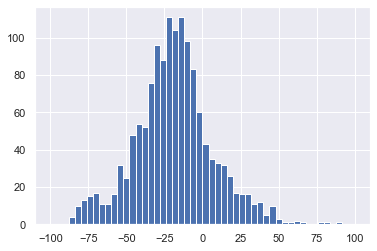

In [54]:
model_v_counts['daily_percent_diff'].hist(bins=50, range=[-100,100])

In [55]:
model_v_counts.sort_values('abs_percent_diff',ascending=False).head(10)

,a,b,model_link_id,distance,feet,numlanes,cntype,useclass,ft,at,capclass,ffs,fft,pemsid,shstgeometryid,cspdEA,cspdAM,cspdMD,cspdPM,cspdEV,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,vol24hr_tot,capEA,capAM,capMD,capPM,capEV,ctimEA,ctimAM,ctimMD,ctimPM,ctimEV,vcEA,vcAM,vcMD,vcPM,vcEV,shstReferenceId,county,name,simple_name,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts,pems_total_counts,daily_diff,daily_percent_diff,abs_percent_diff
967,3025320,3010790,4026837,0.39,2066.43,0,TANA,0,1,5,51,65.0,0.36,0,d97f776fa3fa74a8e764c93c3a0baa75,65.00,61.98,64.68,64.43,65.00,2732.24,13191.06,11486.10,9324.46,4426.09,41159.95,19350.0,23542.5,32250.0,23542.5,51600.0,0.36,0.36,0.36,0.36,0.36,0.1436,0.5935,0.3959,0.4471,0.0957,360091de9ef1bb749bc9d93c97de135e,Contra Costa,NaN,NaN,1647,438,1146,2203,1876,7310,33849,463.05,463.05
635,2530695,2507805,3083339,0.23,1206.41,0,TANA,0,1,2,21,60.0,0.23,0,9811cb73610172436dd3815aed9a7ab0,60.00,59.29,56.74,49.96,59.98,2051.82,9879.99,17049.96,16941.01,11259.55,57182.32,18900.0,22995.0,31500.0,22995.0,50400.0,0.23,0.23,0.23,0.23,0.23,0.1092,0.4373,0.5505,0.7472,0.2256,7da517265ed2af0ab383fac66493e5c2,Alameda,MacArthur Freeway,MacArthur Freeway,4418,619,2720,4252,2957,14966,42216,282.08,282.08
1129,3079038,3071748,4119988,0.21,1120.27,0,TANA,0,1,5,51,65.0,0.20,0,4725b8d271ac51a7e757d7ad918b5e9f,65.00,63.71,63.46,51.37,65.00,1114.99,7137.94,10681.73,11471.00,6323.39,36729.06,12900.0,15695.0,21500.0,15695.0,34400.0,0.20,0.20,0.20,0.20,0.20,0.0886,0.5014,0.5452,0.7946,0.1973,f1bcdc2b0ec2ec54af8423d162c62c43,Contra Costa,NaN,NaN,2700,462,2225,3436,3629,12452,24277,194.96,194.96
1073,3065365,3041638,4086003,0.47,2473.56,0,TANA,0,1,5,51,65.0,0.43,0,22e28e0f7de65031f97299c1d03bc26b,65.00,64.98,64.86,62.97,65.00,802.36,5286.35,10303.70,12354.96,7334.78,36082.15,19350.0,23542.5,32250.0,23542.5,51600.0,0.43,0.43,0.43,0.43,0.43,0.0428,0.2571,0.3532,0.5697,0.1508,ad0b1d9c593e6e67b86d6579e5e58515,Contra Costa,NaN,NaN,2774,1119,1935,3658,3152,12638,23444,185.50,185.50
291,2050282,2063246,2053563,0.14,721.64,0,TANA,0,1,4,41,65.0,0.13,0,2181ebb6995d08411035fb85697099a0,64.94,53.94,64.47,56.25,64.89,8202.57,20387.19,20145.23,18867.69,25979.84,93582.51,32250.0,31390.0,53750.0,31390.0,86000.0,0.13,0.13,0.13,0.13,0.13,0.2616,0.7147,0.4400,0.6920,0.3175,320441aef7094c48f150c72e6a82ce36,Santa Clara,Bayshore Freeway,Bayshore Freeway,7587,804,9865,12052,11973,42281,51301,121.33,121.33
626,2527895,2533063,3123673,0.87,4584.52,0,TANA,0,1,4,41,65.0,0.80,0,797845c6bebbd78b40b4c774255c5ab7,65.00,63.48,60.94,59.45,64.80,1662.93,7108.86,10951.62,9130.66,11985.67,40839.74,12900.0,15695.0,21500.0,15695.0,34400.0,0.80,0.80,0.80,0.80,0.80,0.1323,0.4570,0.5148,0.5837,0.3494,ba195b5ea3bb03322ff71cfcd8efd95b,Alameda,NaN,NaN,3918,755,4920,4763,4900,19256,21583,112.08,112.08
714,2551376,2519001,3057712,0.64,3360.98,0,TANA,0,1,4,41,65.0,0.59,0,700c52caff2f393f5f58169dd2dd92dd,65.00,64.84,62.25,54.96,64.99,1783.85,8890.78,17433.38,17061.01,10424.26,55593.27,19350.0,23542.5,32250.0,23542.5,51600.0,0.59,0.59,0.59,0.59,0.59,0.0947,0.3917,0.5588,0.7452,0.2066,56c640aad8e2273e6b501839f8f66a43,Alameda,NaN,NaN,11851,2855,2876,7452,4149,29183,26410,90.50,90.50
277,2044564,2128759,2138532,0.42,2229.22,0,TANA,0,1,4,41,65.0,0.39,0,507ac1271423f8608a35dc63bc8893b6,65.00,65.00,65.00,65.00,65.00,526.11,1030.10,1128.76,1026.07,554.84,4265.88,19350.0,23542.5,32250.0,23542.5,51600.0,0.39,0.39,0.39,0.39,0.39,0.0276,0.0536,0.0480,0.0612,0.0139,81aa66d260c99c55ce1ddae168b35629,Santa Clara,South Valley Freeway,South Valley Freeway,8331,3824,4376,8822,8003,33356,-29090,-87.21,87.21
460,2128124,2168999,2164139,0.44,2298.20,0,TANA,0,1,3,31,60.0,0.44,0,d61d6a10dce52f5a9108cf953720c1bb,60.00,60.00,60.00,60.00,60.00,343.53,870.53,1147.53,1168.84,706.17,4236.60,18900.0,22995.0,31500.0,22995.0,50400.0,0.44,0.44,0.44,0.44,0.44,0.0188,0.0544,0.0488,0.0639,0.0163,99888aa265ca1bac0839eacd4d400553,Santa Clara,South Valley Freeway,South Valley Freew

In [56]:
def make_validation_scatterplot(x, y, xlabel, ylabel, title):
    plt.figure(figsize=(10,7))
    # xy data
    plt.scatter(x, y, label='freeways', alpha=0.5)
    plt.xlabel(xlabel, size=16)
    plt.ylabel(ylabel, size=16)
    plt.title(title, size=16)
    # set x and y axis limits to the same range
    xy_max = x.max() if y.max() > x.max() else y.max()
    plt.xlim(-xy_max*.05,xy_max*1.1)
    plt.ylim(-xy_max*.05,xy_max*1.1)
    # 45 degree line
    plt.plot([plt.xlim()[0],plt.xlim()[1]], [plt.ylim()[0],plt.ylim()[1]], 'k--', color='black', alpha=0.5, label='45 Degrees')
    # computing fit with R^2
    fit = scipy.stats.linregress(x, y)
#     y.loc[y == 0] = 1
    rmse = np.sqrt(np.mean(((y-x))**2))/y.mean()*100
    plt.plot(x, fit.intercept + fit.slope*x, 'r--', label=f'R^2 = {fit.rvalue**2:.3f}, %RMSE = {rmse:.1f}')
    plt.legend()
    plt.show()

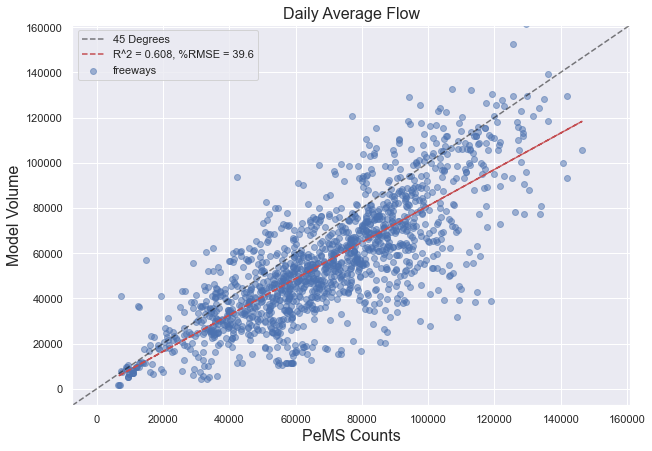

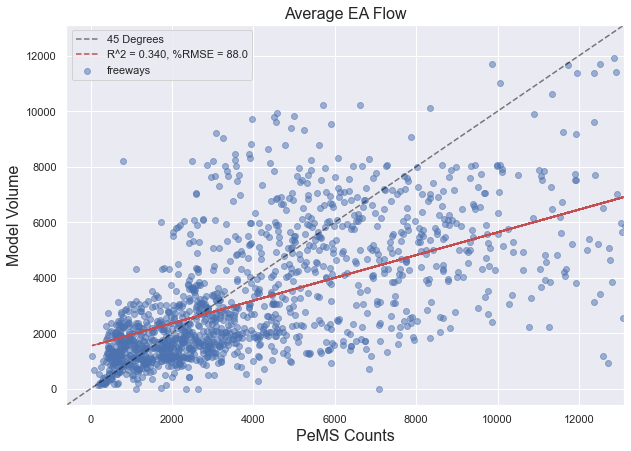

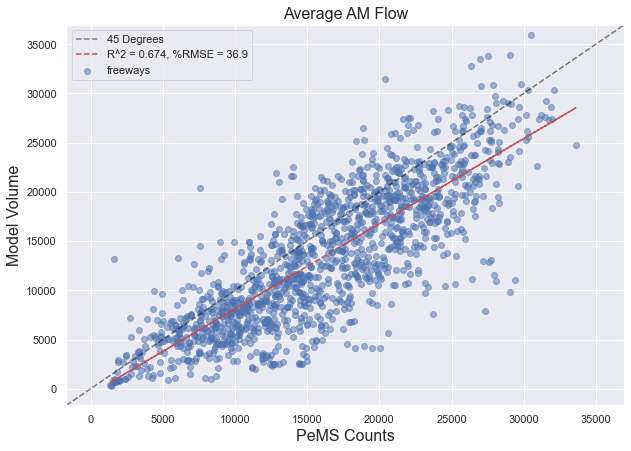

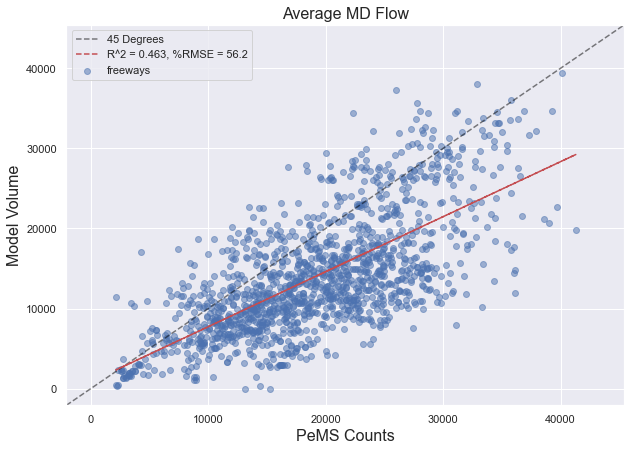

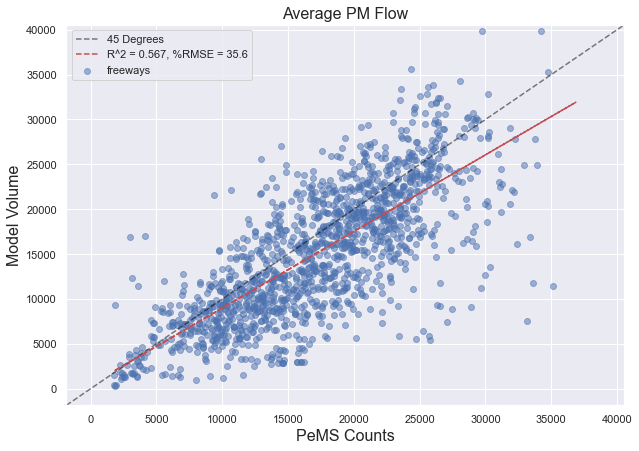

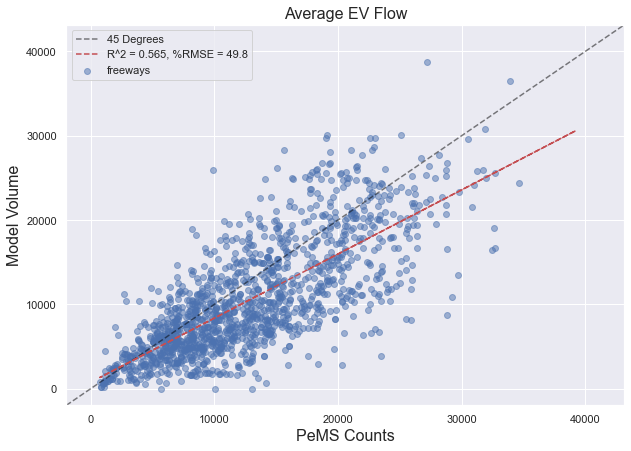

In [57]:
make_validation_scatterplot(
    y=model_v_counts['vol24hr_tot'], 
    x=model_v_counts['pems_total_counts'],
    ylabel='Model Volume', 
    xlabel='PeMS Counts', 
    title='Daily Average Flow')

for period in ['EA', 'AM', 'MD', 'PM', 'EV']:
    make_validation_scatterplot(
        y=model_v_counts['vol' + period + '_tot'], 
        x=model_v_counts['pems_' + period + '_counts'],
        ylabel='Model Volume', 
        xlabel='PeMS Counts', 
        title='Average ' + period + ' Flow')

In [58]:
model_v_counts.head()

,a,b,model_link_id,distance,feet,numlanes,cntype,useclass,ft,at,capclass,ffs,fft,pemsid,shstgeometryid,cspdEA,cspdAM,cspdMD,cspdPM,cspdEV,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,vol24hr_tot,capEA,capAM,capMD,capPM,capEV,ctimEA,ctimAM,ctimMD,ctimPM,ctimEV,vcEA,vcAM,vcMD,vcPM,vcEV,shstReferenceId,county,name,simple_name,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts,pems_total_counts,daily_diff,daily_percent_diff,abs_percent_diff
0,1002422,1021187,2440,0.60,3148.88,0,TANA,0,1,3,31,60.0,0.60,0,dfbb86a393a6fa2148fa5782c9cda0c1,60.00,59.95,59.89,59.07,60.00,1536.39,10494.33,17154.89,17646.65,13223.92,60056.18,31500.0,38325.0,52500.0,38325.0,84000.0,0.60,0.60,0.60,0.60,0.60,0.0493,0.2775,0.3289,0.4630,0.1582,0f79fc9952c739cc0499cad8aece51ef,San Francisco,John F Foran Freeway,John F Foran Freeway,17681,3637,17580,19435,22436,80769,-20712,-25.64,25.64
1,1004047,1013117,4166,2.18,11493.53,0,TANA,0,1,0,1,55.0,2.37,0,083807b14e62ec07ee054ae66938df3a,54.75,9.54,11.72,21.92,54.90,11024.83,42325.74,51422.21,33813.07,24442.49,163028.34,30750.0,37412.5,51250.0,37412.5,82000.0,2.37,2.37,2.37,2.37,2.37,0.3646,1.1395,1.0129,0.9103,0.2998,1a01ce07153cbcc163fbfdad8358b893,San Francisco,San Francisco  Oakland Bay Bridge,San Francisco  Oakland Bay Bridge,32560,10061,20769,32564,25978,121932,41096,33.70,33.70
2,1004082,1015322,4204,0.28,1460.17,0,TANA,0,1,5,51,65.0,0.26,0,b774058f67e031cb51dc7c1164c91beb,64.78,27.04,29.88,37.90,64.91,10936.71,35977.58,48166.11,33361.20,24156.70,152598.30,32250.0,39237.5,53750.0,39237.5,86000.0,0.26,0.26,0.26,0.26,0.26,0.3448,0.9235,0.9046,0.8560,0.2824,1a491fafe3013706604bc91e0a23b9c6,San Francisco,NaN,NaN,30532,15487,22915,32987,23602,125523,27075,21.57,21.57
3,1004498,1016248,4659,0.52,2722.60,0,TANA,0,1,3,31,60.0,0.52,0,1f98a0fcd0309b33ec9df95afe31e5b9,60.00,59.98,59.82,58.17,60.00,1349.73,7100.48,14298.03,15011.83,12575.39,50335.46,25200.0,30660.0,42000.0,30660.0,67200.0,0.52,0.52,0.52,0.52,0.52,0.0551,0.2464,0.3528,0.5111,0.1963,1d140df41c47950b5fa885108b91332a,San Francisco,John F Foran Freeway,John F Foran Freeway,12198,1898,18546,19676,23171,75489,-25153,-33.32,33.32
4,1004761,1019173,4951,0.33,1754.97,0,TANA,0,1,2,21,60.0,0.33,0,939c62fb8082f696f720efcc51e61738,59.99,50.08,54.76,52.64,59.87,7143.19,26756.80,31987.37,24489.98,25342.13,115719.47,31500.0,38325.0,52500.0,38325.0,84000.0,0.33,0.33,0.33,0.33,0.33,0.2334,0.7233,0.6321,0.6738,0.3176,1f068be799c2e788a69df7c76e78d034,San Francisco,James Lick Freeway,James Lick Freeway,29219,7238,27103,31637,19974,115171,548,0.48,0.48


In [59]:
# def calc_percent_rmse(data, model_col, count_col):
#     x = data[count_col]
#     y = data[model_col]
#     rmse = np.sqrt(np.mean(((y-x))**2))/y.mean()*100
#     return rmse
    

# model_v_counts.groupby('county').agg(
#     num_links=('model_link_id', 'count'),
#     avg_model_volume=('vol24hr_tot', 'mean'),
#     avg_pems_volume=('pems_total_counts', 'mean'),
#     percent_RMSE=('vol24hr_tot', 'pems_total_counts', lambda data: calc_percent_rmse(data, 'vol24hr_tot', 'pems_total_counts'))
# ).astype(int)

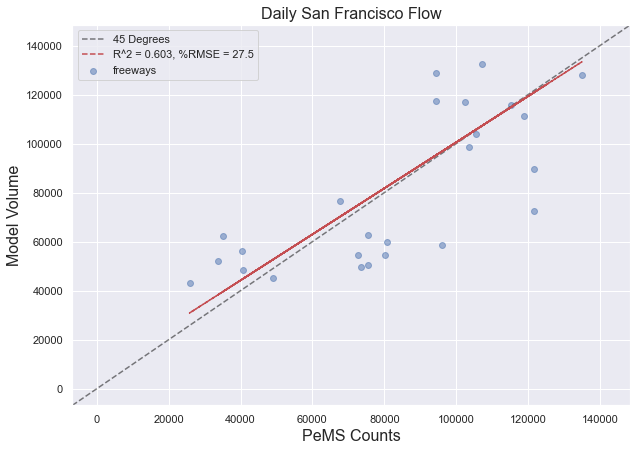

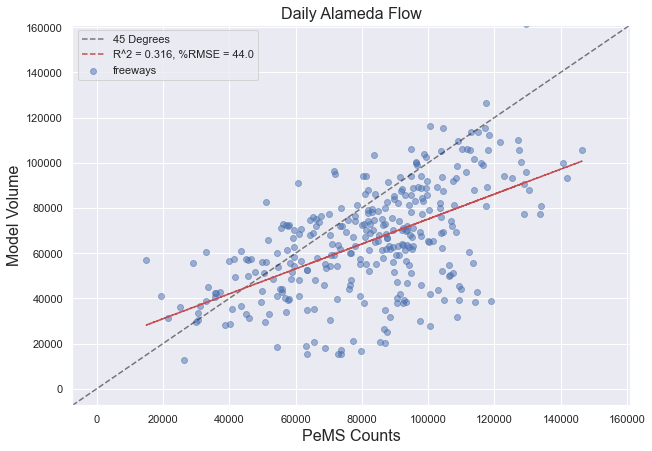

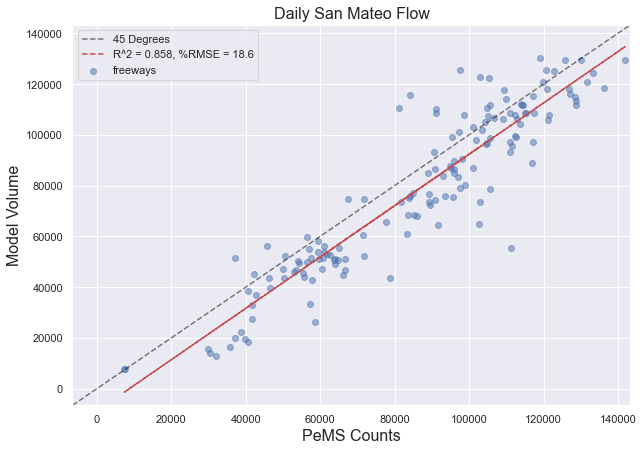

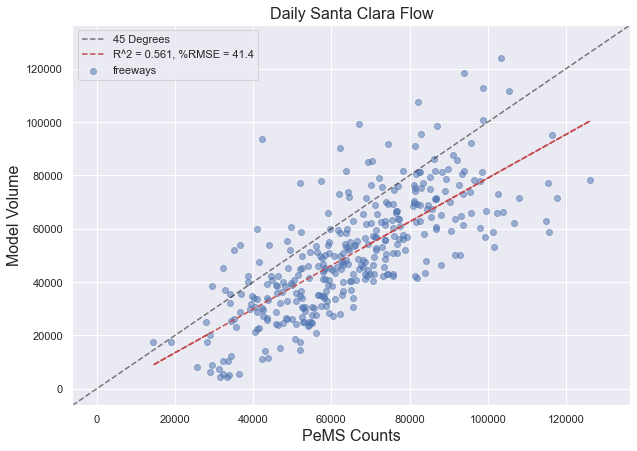

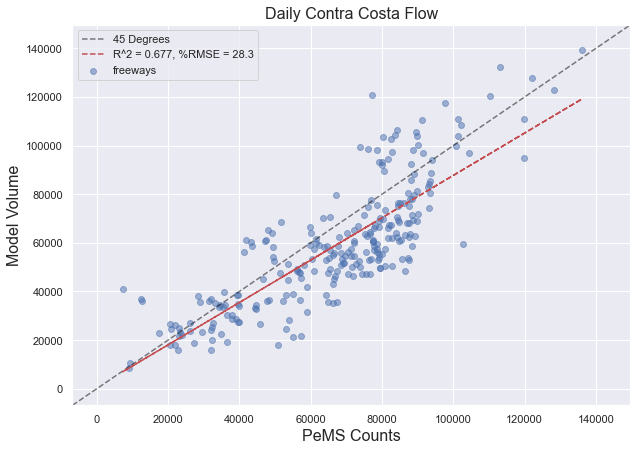

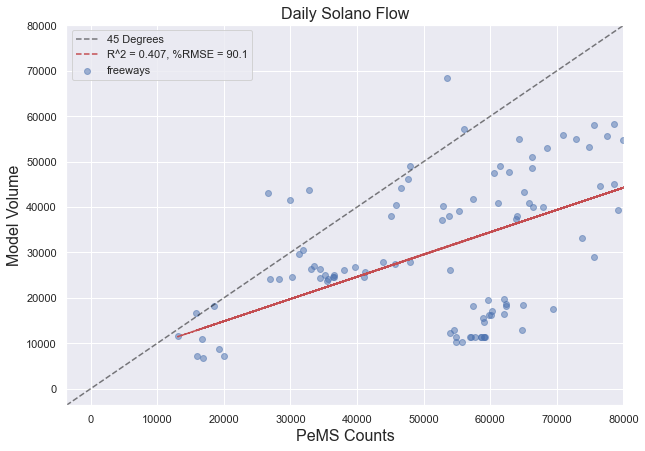

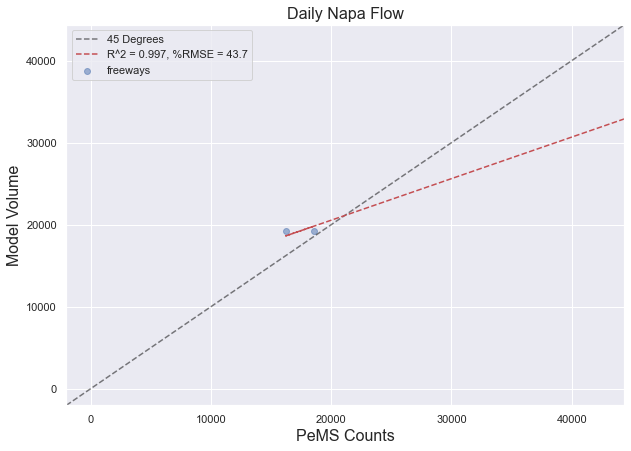

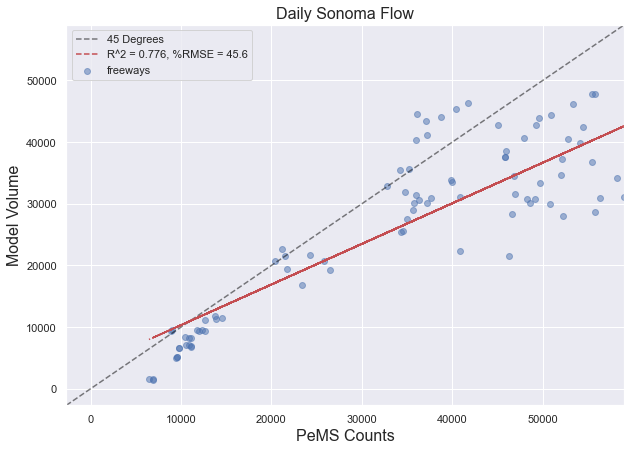

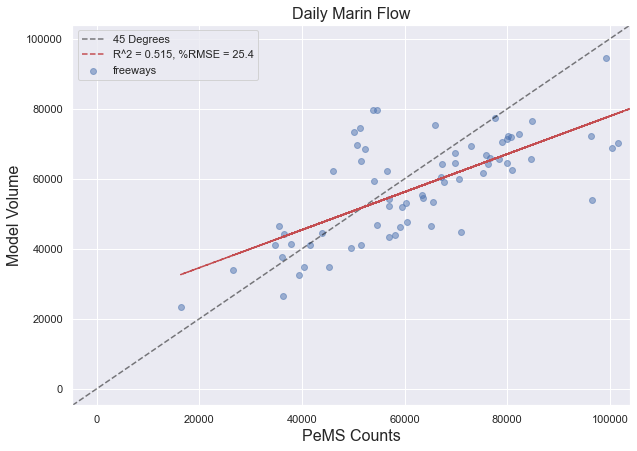

In [60]:
for county in model_v_counts['county'].unique():
    make_validation_scatterplot(
        y=model_v_counts.loc[model_v_counts['county'] == county, 'vol24hr_tot'], 
        x=model_v_counts.loc[model_v_counts['county'] == county, 'pems_total_counts'],
        ylabel='Model Volume', 
        xlabel='PeMS Counts', 
        title='Daily ' + county + ' Flow')

In [61]:
model_v_counts[(model_v_counts['vol24hr_tot'] > 50000) & (model_v_counts['pems_total_counts'] < 25000)].head(15)


,a,b,model_link_id,distance,feet,numlanes,cntype,useclass,ft,at,capclass,ffs,fft,pemsid,shstgeometryid,cspdEA,cspdAM,cspdMD,cspdPM,cspdEV,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,vol24hr_tot,capEA,capAM,capMD,capPM,capEV,ctimEA,ctimAM,ctimMD,ctimPM,ctimEV,vcEA,vcAM,vcMD,vcPM,vcEV,shstReferenceId,county,name,simple_name,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts,pems_total_counts,daily_diff,daily_percent_diff,abs_percent_diff
635,2530695,2507805,3083339,0.23,1206.41,0,TANA,0,1,2,21,60.0,0.23,0,9811cb73610172436dd3815aed9a7ab0,60.0,59.29,56.74,49.96,59.98,2051.82,9879.99,17049.96,16941.01,11259.55,57182.32,18900.0,22995.0,31500.0,22995.0,50400.0,0.23,0.23,0.23,0.23,0.23,0.1092,0.4373,0.5505,0.7472,0.2256,7da517265ed2af0ab383fac66493e5c2,Alameda,MacArthur Freeway,MacArthur Freeway,4418,619,2720,4252,2957,14966,42216,282.08,282.08


In [62]:
model_v_counts[(model_v_counts['vol24hr_tot'] > 150000)].head(15)

,a,b,model_link_id,distance,feet,numlanes,cntype,useclass,ft,at,capclass,ffs,fft,pemsid,shstgeometryid,cspdEA,cspdAM,cspdMD,cspdPM,cspdEV,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,vol24hr_tot,capEA,capAM,capMD,capPM,capEV,ctimEA,ctimAM,ctimMD,ctimPM,ctimEV,vcEA,vcAM,vcMD,vcPM,vcEV,shstReferenceId,county,name,simple_name,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts,pems_total_counts,daily_diff,daily_percent_diff,abs_percent_diff
1,1004047,1013117,4166,2.18,11493.53,0,TANA,0,1,0,1,55.0,2.37,0,083807b14e62ec07ee054ae66938df3a,54.75,9.54,11.72,21.92,54.90,11024.83,42325.74,51422.21,33813.07,24442.49,163028.34,30750.0,37412.5,51250.0,37412.5,82000.0,2.37,2.37,2.37,2.37,2.37,0.3646,1.1395,1.0129,0.9103,0.2998,1a01ce07153cbcc163fbfdad8358b893,San Francisco,San Francisco  Oakland Bay Bridge,San Francisco  Oakland Bay Bridge,32560,10061,20769,32564,25978,121932,41096,33.70,33.70
2,1004082,1015322,4204,0.28,1460.17,0,TANA,0,1,5,51,65.0,0.26,0,b774058f67e031cb51dc7c1164c91beb,64.78,27.04,29.88,37.90,64.91,10936.71,35977.58,48166.11,33361.20,24156.70,152598.30,32250.0,39237.5,53750.0,39237.5,86000.0,0.26,0.26,0.26,0.26,0.26,0.3448,0.9235,0.9046,0.8560,0.2824,1a491fafe3013706604bc91e0a23b9c6,San Francisco,NaN,NaN,30532,15487,22915,32987,23602,125523,27075,21.57,21.57
17,1011771,2558049,3055540,2.53,13373.10,0,TANA,0,1,5,51,65.0,2.34,0,69d1409864d9451e0e3bcd0681c6e0a5,65.00,52.21,23.27,10.67,62.40,4838.99,27379.25,46946.32,44485.66,44745.21,168395.42,32250.0,39237.5,53750.0,39237.5,86000.0,2.34,2.34,2.34,2.34,2.34,0.1540,0.7024,0.8787,1.1361,0.5213,5378674e6323205dad56195b9c34325f,Alameda,NaN,NaN,21655,3722,39235,32358,31544,128514,39881,31.03,31.03
33,1024160,1003274,38545,2.18,11503.24,0,TANA,0,1,0,1,55.0,2.38,0,090981437221269faa5f2fe63862d7ec,55.00,41.05,15.55,6.67,51.94,4853.00,27527.07,47488.76,45054.45,45194.61,170117.89,30750.0,37412.5,51250.0,37412.5,82000.0,2.38,2.38,2.38,2.38,2.38,0.1620,0.7411,0.9323,1.2070,0.5523,f17390eba6f0d35a7ed1bbfaebe84263,San Francisco,San Francisco  Oakland Bay Bridge,San Francisco  Oakland Bay Bridge,22095,3605,36547,31481,31289,125017,45100,36.08,36.08
763,2568871,1004082,3082623,2.57,13584.93,0,TANA,0,1,5,51,65.0,2.37,0,3b4431a5472355c622bb0538b433c0e1,64.78,15.31,17.84,30.98,64.91,10952.19,41661.48,50962.98,33586.38,24295.14,161458.17,32250.0,39237.5,53750.0,39237.5,86000.0,2.37,2.37,2.37,2.37,2.37,0.3453,1.0694,0.9571,0.8618,0.2840,7c9b616f34bb6c8961d3ad3c092e91a5,Alameda,NaN,NaN,31431,14909,23599,33871,25642,129452,32006,24.72,24.72


In [63]:
model_v_counts[(model_v_counts['pems_total_counts'] > 150000)].head(15)

,a,b,model_link_id,distance,feet,numlanes,cntype,useclass,ft,at,capclass,ffs,fft,pemsid,shstgeometryid,cspdEA,cspdAM,cspdMD,cspdPM,cspdEV,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,vol24hr_tot,capEA,capAM,capMD,capPM,capEV,ctimEA,ctimAM,ctimMD,ctimPM,ctimEV,vcEA,vcAM,vcMD,vcPM,vcEV,shstReferenceId,county,name,simple_name,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts,pems_total_counts,daily_diff,daily_percent_diff,abs_percent_diff


In [64]:
model_v_counts['ft'].value_counts()

1    1408
Name: ft, dtype: int64

In [65]:
model_net.crs = 'PROJCS["NAD_1983_StatePlane_California_VI_FIPS_0406_Feet",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.017453292519943295]],PROJECTION["Lambert_Conformal_Conic"],PARAMETER["False_Easting",6561666.666666666],PARAMETER["False_Northing",1640416.666666667],PARAMETER["Central_Meridian",-116.25],PARAMETER["Standard_Parallel_1",32.78333333333333],PARAMETER["Standard_Parallel_2",33.88333333333333],PARAMETER["Latitude_Of_Origin",32.16666666666666],UNIT["Foot_US",0.30480060960121924]]'

In [66]:
model_net.to_crs(epsg=4326, inplace=True)

In [67]:
# merging in link shapes to be able to visualize interactively in ArcMap
model_v_counts_gdf = pd.merge(
    model_net[['MODEL_LINK_', 'geometry']],
    model_v_counts,
    how='right',
    left_on='MODEL_LINK_',
    right_on='model_link_id',
)

In [68]:
model_v_counts_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
model_v_counts_gdf.head()

,MODEL_LINK_,geometry,a,b,model_link_id,distance,feet,numlanes,cntype,useclass,ft,at,capclass,ffs,fft,pemsid,shstgeometryid,cspdEA,cspdAM,cspdMD,cspdPM,cspdEV,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,vol24hr_tot,capEA,capAM,capMD,capPM,capEV,ctimEA,ctimAM,ctimMD,ctimPM,ctimEV,vcEA,vcAM,vcMD,vcPM,vcEV,shstReferenceId,county,name,simple_name,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts,pems_total_counts,daily_diff,daily_percent_diff,abs_percent_diff
0,2440,"LINESTRING (-122.44580 37.72655, -122.44852 37...",1002422,1021187,2440,0.60,3148.88,0,TANA,0,1,3,31,60.0,0.60,0,dfbb86a393a6fa2148fa5782c9cda0c1,60.00,59.95,59.89,59.07,60.00,1536.39,10494.33,17154.89,17646.65,13223.92,60056.18,31500.0,38325.0,52500.0,38325.0,84000.0,0.60,0.60,0.60,0.60,0.60,0.0493,0.2775,0.3289,0.4630,0.1582,0f79fc9952c739cc0499cad8aece51ef,San Francisco,John F Foran Freeway,John F Foran Freeway,17681,3637,17580,19435,22436,80769,-20712,-25.64,25.64
1,4166,"LINESTRING (-122.36734 37.80808, -122.39111 37...",1004047,1013117,4166,2.18,11493.53,0,TANA,0,1,0,1,55.0,2.37,0,083807b14e62ec07ee054ae66938df3a,54.75,9.54,11.72,21.92,54.90,11024.83,42325.74,51422.21,33813.07,24442.49,163028.34,30750.0,37412.5,51250.0,37412.5,82000.0,2.37,2.37,2.37,2.37,2.37,0.3646,1.1395,1.0129,0.9103,0.2998,1a01ce07153cbcc163fbfdad8358b893,San Francisco,San Francisco  Oakland Bay Bridge,San Francisco  Oakland Bay Bridge,32560,10061,20769,32564,25978,121932,41096,33.70,33.70
2,4204,"LINESTRING (-122.36131 37.81383, -122.36422 37...",1004082,1015322,4204,0.28,1460.17,0,TANA,0,1,5,51,65.0,0.26,0,b774058f67e031cb51dc7c1164c91beb,64.78,27.04,29.88,37.90,64.91,10936.71,35977.58,48166.11,33361.20,24156.70,152598.30,32250.0,39237.5,53750.0,39237.5,86000.0,0.26,0.26,0.26,0.26,0.26,0.3448,0.9235,0.9046,0.8560,0.2824,1a491fafe3013706604bc91e0a23b9c6,San Francisco,NaN,NaN,30532,15487,22915,32987,23602,125523,27075,21.57,21.57
3,4659,"LINESTRING (-122.43212 37.73225, -122.44025 37...",1004498,1016248,4659,0.52,2722.60,0,TANA,0,1,3,31,60.0,0.52,0,1f98a0fcd0309b33ec9df95afe31e5b9,60.00,59.98,59.82,58.17,60.00,1349.73,7100.48,14298.03,15011.83,12575.39,50335.46,25200.0,30660.0,42000.0,30660.0,67200.0,0.52,0.52,0.52,0.52,0.52,0.0551,0.2464,0.3528,0.5111,0.1963,1d140df41c47950b5fa885108b91332a,San Francisco,John F Foran Freeway,John F Foran Freeway,12198,1898,18546,19676,23171,75489,-25153,-33.32,33.32
4,4951,"LINESTRING (-122.40769 37.74090, -122.40508 37...",1004761,1019173,4951,0.33,1754.97,0,TANA,0,1,2,21,60.0,0.33,0,939c62fb8082f696f720efcc51e61738,59.99,50.08,54.76,52.64,59.87,7143.19,26756.80,31987.37,24489.98,25342.13,115719.47,31500.0,38325.0,52500.0,38325.0,84000.0,0.33,0.33,0.33,0.33,0.33,0.2334,0.7233,0.6321,0.6738,0.3176,1f068be799c2e788a69df7c76e78d034,San Francisco,James Lick Freeway,James Lick Freeway,29219,7238,27103,31637,19974,115171,548,0.48,0.48


In [70]:
model_v_counts_gdf.to_file(r'..\output\model_links_with_counts.shp')

## Bridges

In [71]:
bridge_names = [
    'Benicia-Martinez Bridge', # I-80 between concord and vallejo SB
    'Senator Daniel E Boatwright Highway/Benicia-Martinez Bridge', # NB
    'Redwood Highway/Robin Williams Tunnel', # Just north of GG bridg
    # no count data on San Rafael Bridge (I-580)
    'San Francisco – Oakland Bay Bridge', # Only west of Treasure Island
    'Bayfront Expressway/Dumbarton Bridge', # South end of Bay EB
    'Dumbarton Bridge/Bayfront Expressway',  # WB
    'Carquinez Bridge/Eastshore Freeway',  # I-80 south of Vallejo
    'Just N of Carquinez Bridge',
    # Not in model, added to data with dictionary below
    'San Mateo Bridge', 
    
]

bridge_link_ids_to_names_dict = {
    3082623: 'San Francisco – Oakland Bay Bridge',  # 'San Francisco – Oakland Bay Bridge', East of Treasure Island, Westbound
    3055540: 'San Francisco – Oakland Bay Bridge',  # 'San Francisco – Oakland Bay Bridge', East of Treasure Island, Eastbound
    1072290: 'San Mateo Bridge', # West end of San Mateo Bridge, Westbound
    1016063: 'San Mateo Bridge', # West end of San Mateo Bridge, Eastbound
    5032540: 'Just N of Carquinez Bridge', # No count station on bridge NB, can exit from highway before this counts
}

In [72]:
missing_bridge_names = model_v_counts_gdf['model_link_id'].isin(bridge_link_ids_to_names_dict.keys())
model_v_counts_gdf.loc[missing_bridge_names, 'name'] = model_v_counts_gdf.loc[missing_bridge_names, 'model_link_id'].map(bridge_link_ids_to_names_dict)
model_v_counts_bridges = model_v_counts_gdf[model_v_counts_gdf['name'].isin(bridge_names)].copy()

In [73]:
bridge_direction_lookup = counts_13to17.loc[counts_13to17['shstReferenceId'].isin(
    model_v_counts_bridges['shstReferenceId']),['shstReferenceId', 'direction']].drop_duplicates(keep='first')
bridge_direction_lookup = bridge_direction_lookup.set_index('shstReferenceId')['direction'].to_dict()
model_v_counts_bridges['direction'] = model_v_counts_bridges['shstReferenceId'].map(bridge_direction_lookup)

In [74]:
bridge_comp_cols = ['name', 'direction',
                    'vol24hr_tot', 'pems_total_counts', 'daily_diff','daily_percent_diff','abs_percent_diff',
                    'volEA_tot', 'volAM_tot', 'volMD_tot', 'volPM_tot', 'volEV_tot',
                    'pems_AM_counts','pems_EA_counts','pems_EV_counts','pems_MD_counts','pems_PM_counts']
sort_dict = dict(zip(bridge_names, range(len(bridge_names))))
model_v_counts_bridges['sort_order'] = model_v_counts_bridges['name'].map(sort_dict)
model_v_counts_bridges = model_v_counts_bridges.sort_values('sort_order')
model_v_counts_bridges[bridge_comp_cols]

,name,direction,vol24hr_tot,pems_total_counts,daily_diff,daily_percent_diff,abs_percent_diff,volEA_tot,volAM_tot,volMD_tot,volPM_tot,volEV_tot,pems_AM_counts,pems_EA_counts,pems_EV_counts,pems_MD_counts,pems_PM_counts
1201,Benicia-Martinez Bridge,S,68414.58,51670,16744,32.41,32.41,5909.50,21245.65,18983.42,13765.77,8510.24,16112,4547,5688,13330,11993
879,Senator Daniel E Boatwright Highway/Benicia-Ma...,N,68475.18,53522,14953,27.94,27.94,2966.79,8353.88,18400.29,22363.18,16391.03,10534,2114,9990,14124,16760
1396,Redwood Highway/Robin Williams Tunnel,S,68531.22,52283,16248,31.08,31.08,3241.75,22320.46,21444.83,13505.86,8018.32,18678,2683,5309,13832,11781
1404,Redwood Highway/Robin Williams Tunnel,N,79804.79,54621,25183,46.10,46.10,2029.50,9716.57,22597.47,25893.95,19567.31,9061,656,11999,14673,18232
15,San Francisco – Oakland Bay Bridge,E,168395.42,128514,39881,31.03,31.03,4838.99,27379.25,46946.32,44485.66,44745.21,21655,3722,39235,32358,31544
739,San Francisco – Oakland Bay Bridge,W,161458.17,129452,32006,24.72,24.72,10952.19,41661.48,50962.98,33586.38,24295.14,31431,14909,23599,33871,25642
161,Bayfront Expressway/Dumbarton Bridge,E,57520.36,41479,16041,38.67,38.67,1523.20,8084.48,15678.68,22033.13,10200.88,4342,484,9725,8478,18450
772,Dumbarton Bridge/Bayfront Expressway,W,42327.94,36116,6211,17.20,17.20,2346.58,17021.96,11556.83,7300.76,4101.81,17678,2977,2754,7879,4828
1000,Carquinez Bridge/Eastshore Freeway,W,47604.53,57133,-9528,-16.68,16.68,5389.49,16441.12,9866.48,9826.30,6081.14,15327,8664,8966,14018,10158
1195,Just N of Carquinez Bridge,E,46173.08,47694,-1520,-3.19,3.19,1006.69,5977.44,12883.57,15646.85,10658.53,10313,4896,9337,12045,11103


In [75]:
model_v_counts_bridges[bridge_comp_cols].to_csv(r'..\output\bridge_counts.csv', index=False)

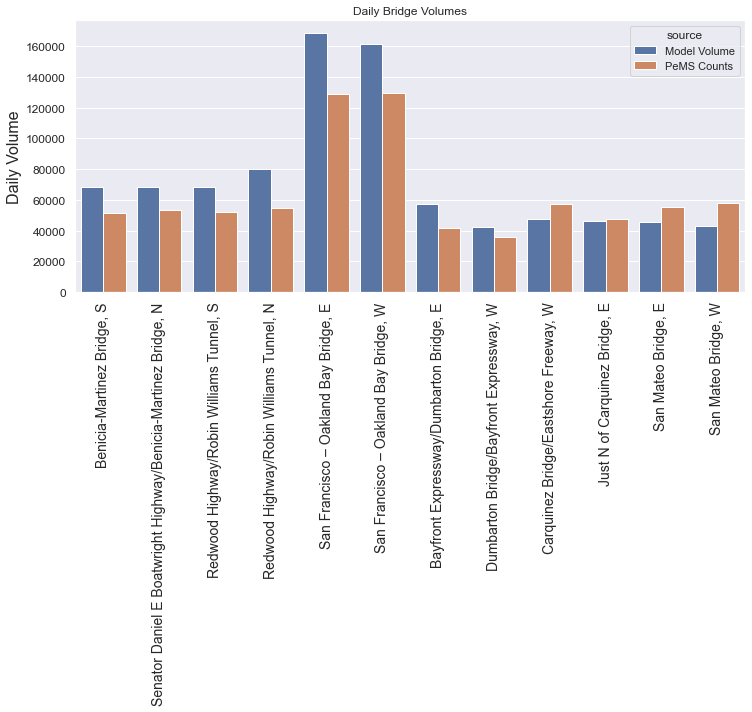

In [76]:
labels_dict = {
    'vol24hr_tot': 'Model Volume',
    'pems_total_counts': 'PeMS Counts'
}

model_v_counts_bridges_melt = model_v_counts_bridges.melt(id_vars=['name', 'direction'], value_vars=['vol24hr_tot', 'pems_total_counts'])
model_v_counts_bridges_melt['name_dir'] = model_v_counts_bridges_melt['name'] + ', ' +  model_v_counts_bridges_melt['direction']
model_v_counts_bridges_melt['source'] = model_v_counts_bridges_melt['variable'].map(labels_dict)


plt.figure(figsize=(12,5))
sns.barplot(
    data=model_v_counts_bridges_melt,
    x='name_dir',
    y='value',
    hue='source'
)
plt.xticks(rotation=90, size=14)
plt.xlabel('')
plt.yticks(size=12)
plt.title('Daily Bridge Volumes')
plt.ylabel('Daily Volume', size=16)
plt.show()

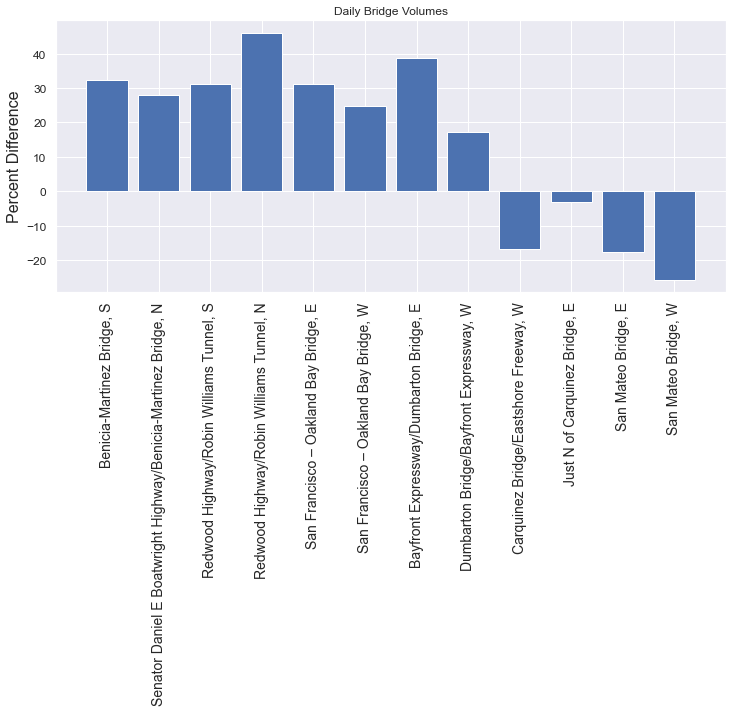

In [77]:
model_v_counts_bridges['name_dir'] = model_v_counts_bridges['name'] + ', ' +  model_v_counts_bridges['direction']
plt.figure(figsize=(12,5))
plt.bar(
    data=model_v_counts_bridges,
    x='name_dir',
    height='daily_percent_diff',
)
plt.xticks(rotation=90, size=14)
plt.xlabel('')
plt.yticks(size=12)
plt.title('Daily Bridge Volumes')
plt.ylabel('Percent Difference', size=16)
plt.show()